In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

from tabGAN import TabGAN
from src import constants as const

imports_path = "src//imports.ipynb"

%run "$imports_path"

if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [2]:
data = pd.read_csv(os.path.join(const.dir.data_comparison(), "adult_edited.csv"))
indices_train = np.load(os.path.join(const.dir.data_comparison(), "indices", "adult_edited", "bool_indices_0.npy"))
data_train = data.loc[indices_train, :]
data_test = data.loc[~ indices_train,:]
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [3]:
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

tg = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1, 
              quantile_transformation_int = False, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max)

# tg_qt = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
#               quantile_transformation_int = True, quantile_rand_transformation = False,
#              noise_discrete_unif_max = noise_discrete_unif_max)

# tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
#               quantile_transformation_int = True, quantile_rand_transformation = True,
#              noise_discrete_unif_max = noise_discrete_unif_max)

2022-06-26 05:06:56.438412: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
if retrain:
    timer_tgan = load_timer(timer_path)
    timer_tgan.start("tabGAN")
    tg.train(n_epochs, batch_size = batch_size, restart_training = True, loss_plot_update_every = loss_plot_update_every,
             loss_plot_type = "line", save_dir = image_dir, plot_loss = False, progress_bar=True,
             filename_train_loss = "train_loss_plot_tabGAN.jpg", ckpt_every = ckpt_every)
    timer_tgan.stop("tabGAN")
    timer_tgan.save(timer_path)

In [6]:
if retrain:
    timer_tgan = load_timer(timer_path)
    timer_tgan.start("tabGAN-qt")
    tg_qt.train(n_epochs, batch_size = batch_size, restart_training = True, loss_plot_update_every = loss_plot_update_every,
             loss_plot_type = "line", save_dir = image_dir, plot_loss = False, progress_bar=True,
             filename_train_loss = "train_loss_plot_tabGAN-qt.jpg", ckpt_every = ckpt_every)
    timer_tgan.stop("tabGAN-qt")
    timer_tgan.save(timer_path)

In [49]:
if retrain:
    timer_tgan = load_timer(timer_path)
    timer_tgan.start("tabGAN-qtr")
    tg_qtr.train(n_epochs, batch_size = batch_size, restart_training = True, loss_plot_update_every = loss_plot_update_every,
             loss_plot_type = "line", save_dir = image_dir, plot_loss = False, progress_bar=True,
             filename_train_loss = "train_loss_plot_tabGAN-qtr.jpg", ckpt_every = ckpt_every)
    timer_tgan.stop("tabGAN-qtr")
    timer_tgan.save(timer_path)

  0%|          | 0/40 [00:00<?, ?it/s]

Elapsed time for tabGAN-qtr: 313.615 seconds


In [5]:
compare_hist_prefix = "comp_hist_"
image_type = ".pdf"
discrete_xtick_rotation = 75
figsize=[15,20]
n_img_horiz = 3

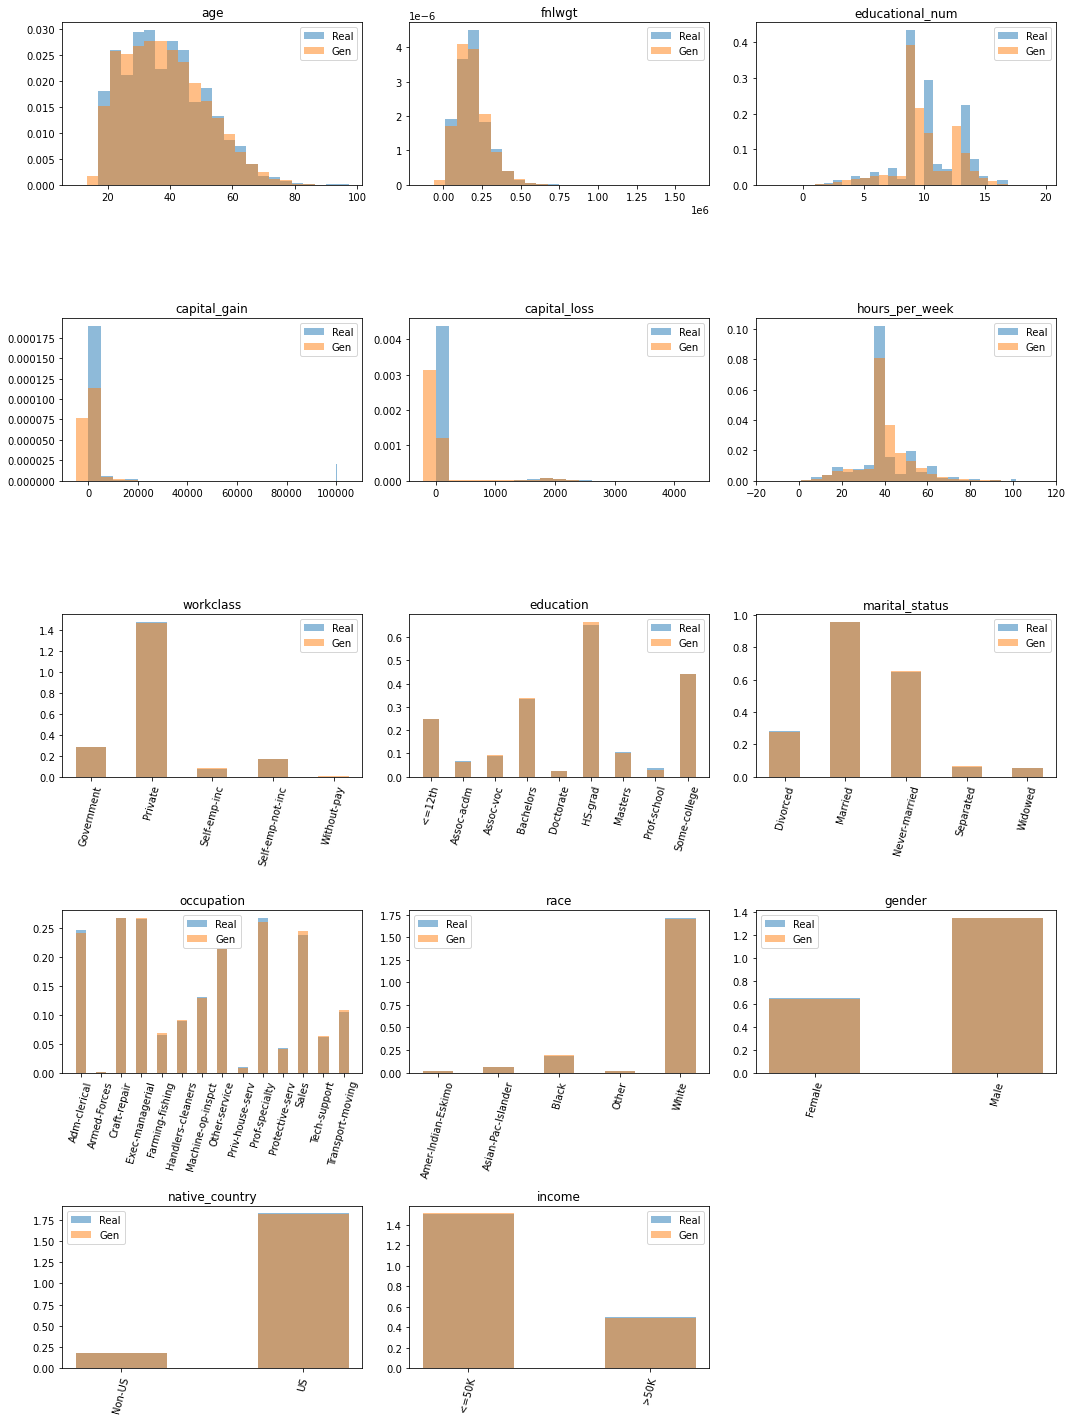

In [7]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "tabGAN", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "tabGAN-sd" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

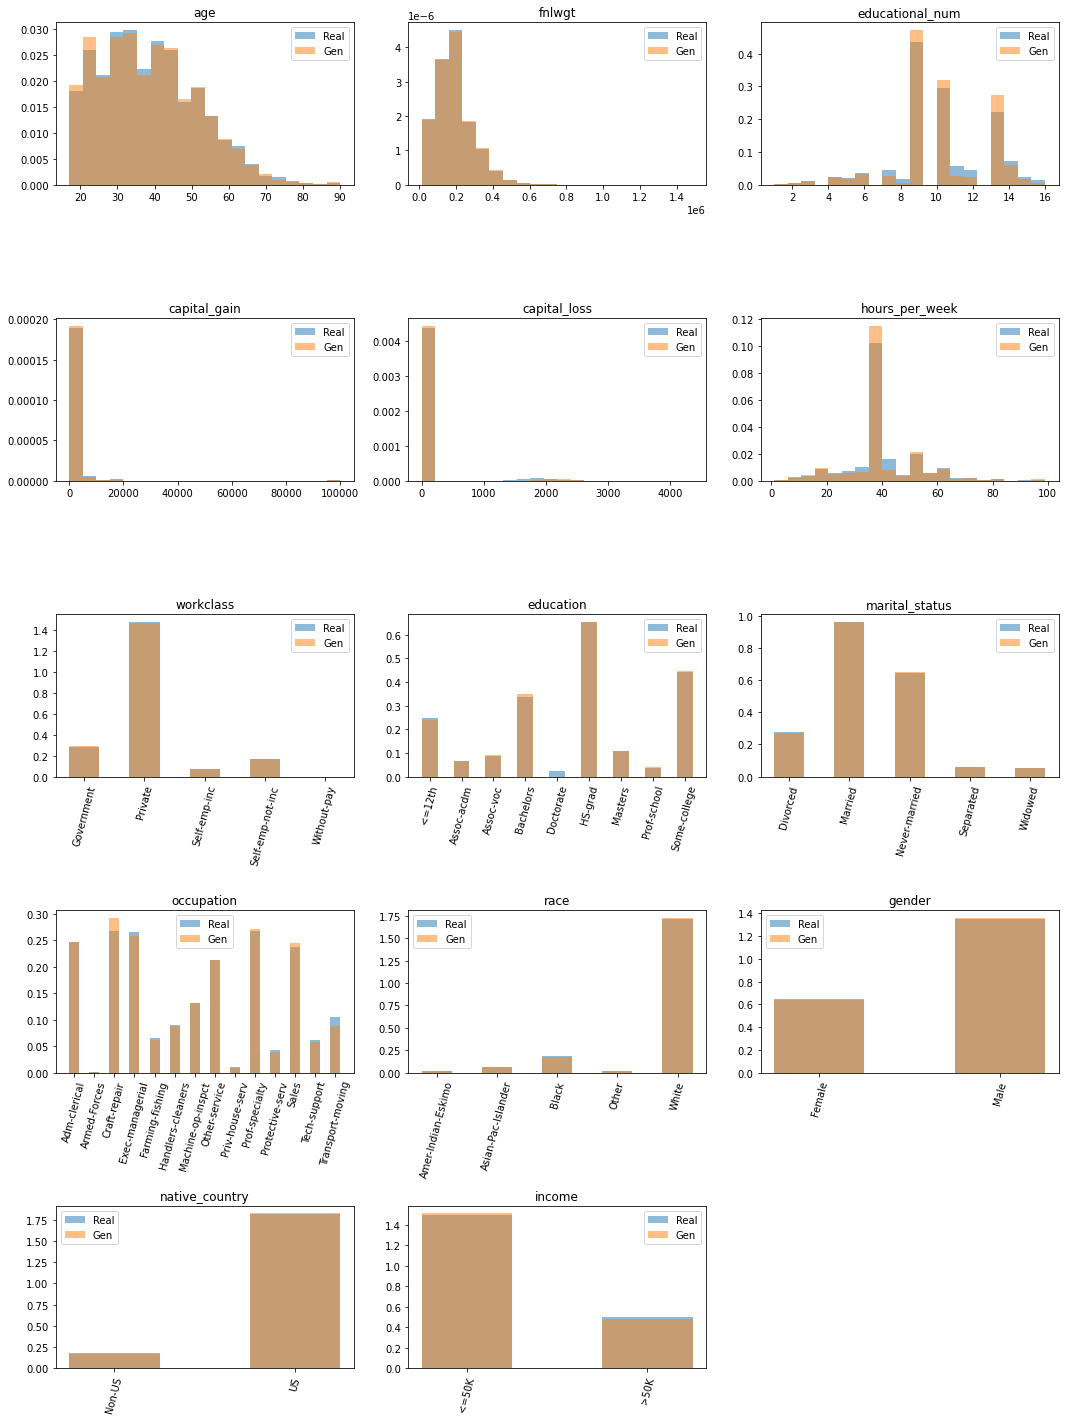

In [82]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "tabGAN-qt", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "tabGAN-qt" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

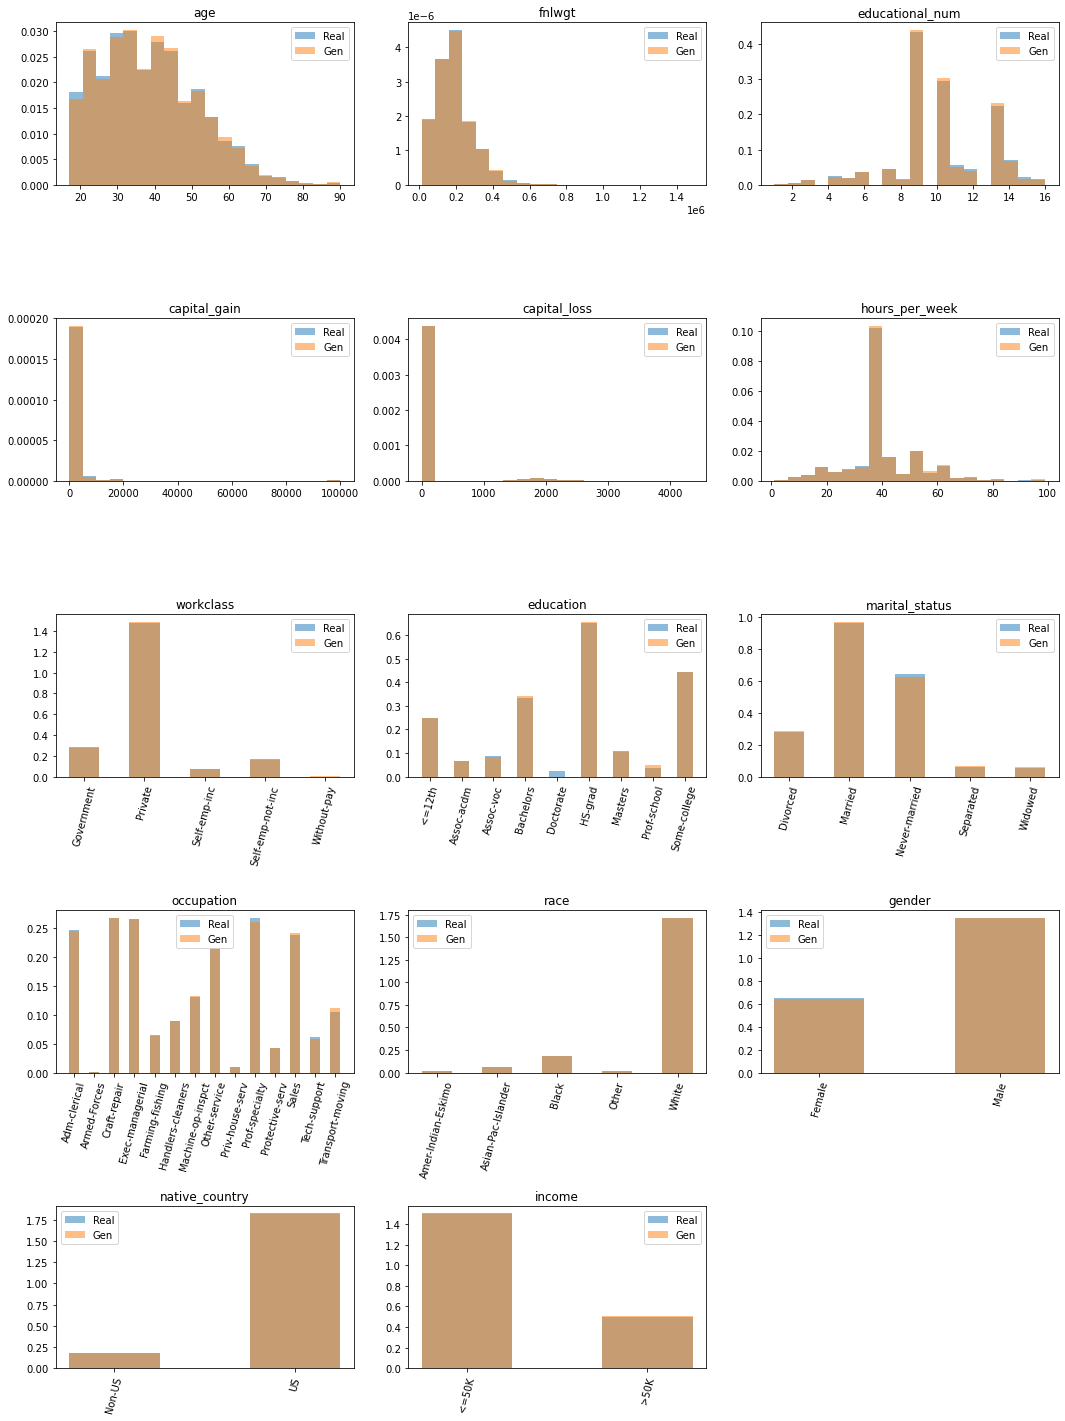

In [83]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "tabGAN-qtr", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "tabGAN-qtr" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

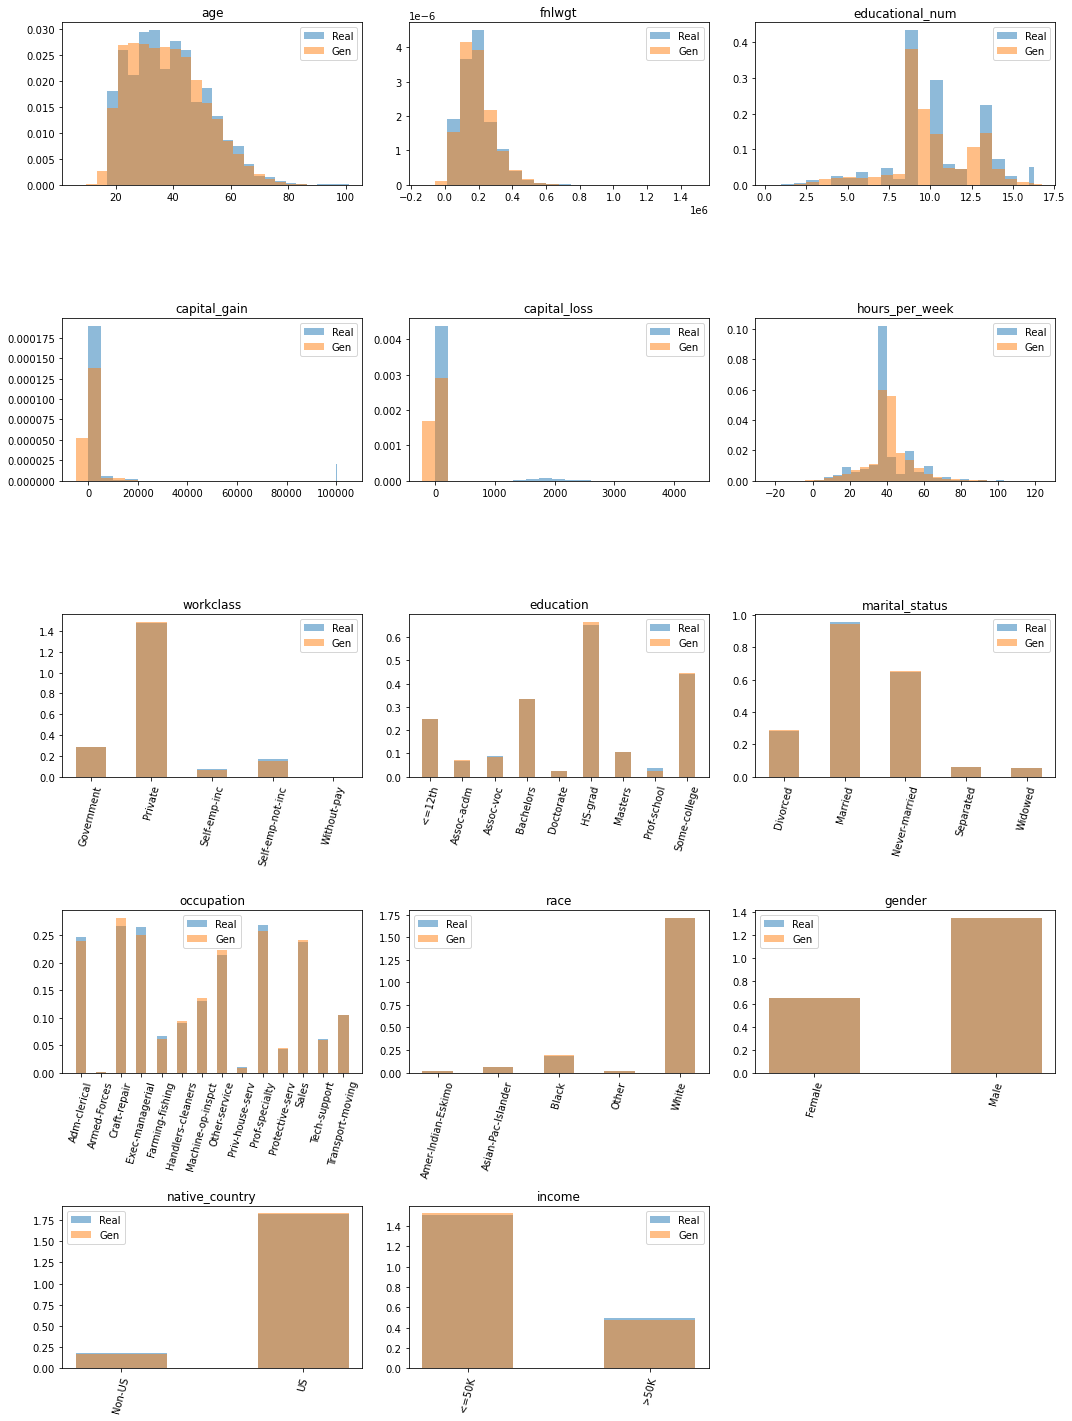

In [84]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "ctabGAN", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "ctabGAN-sd" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

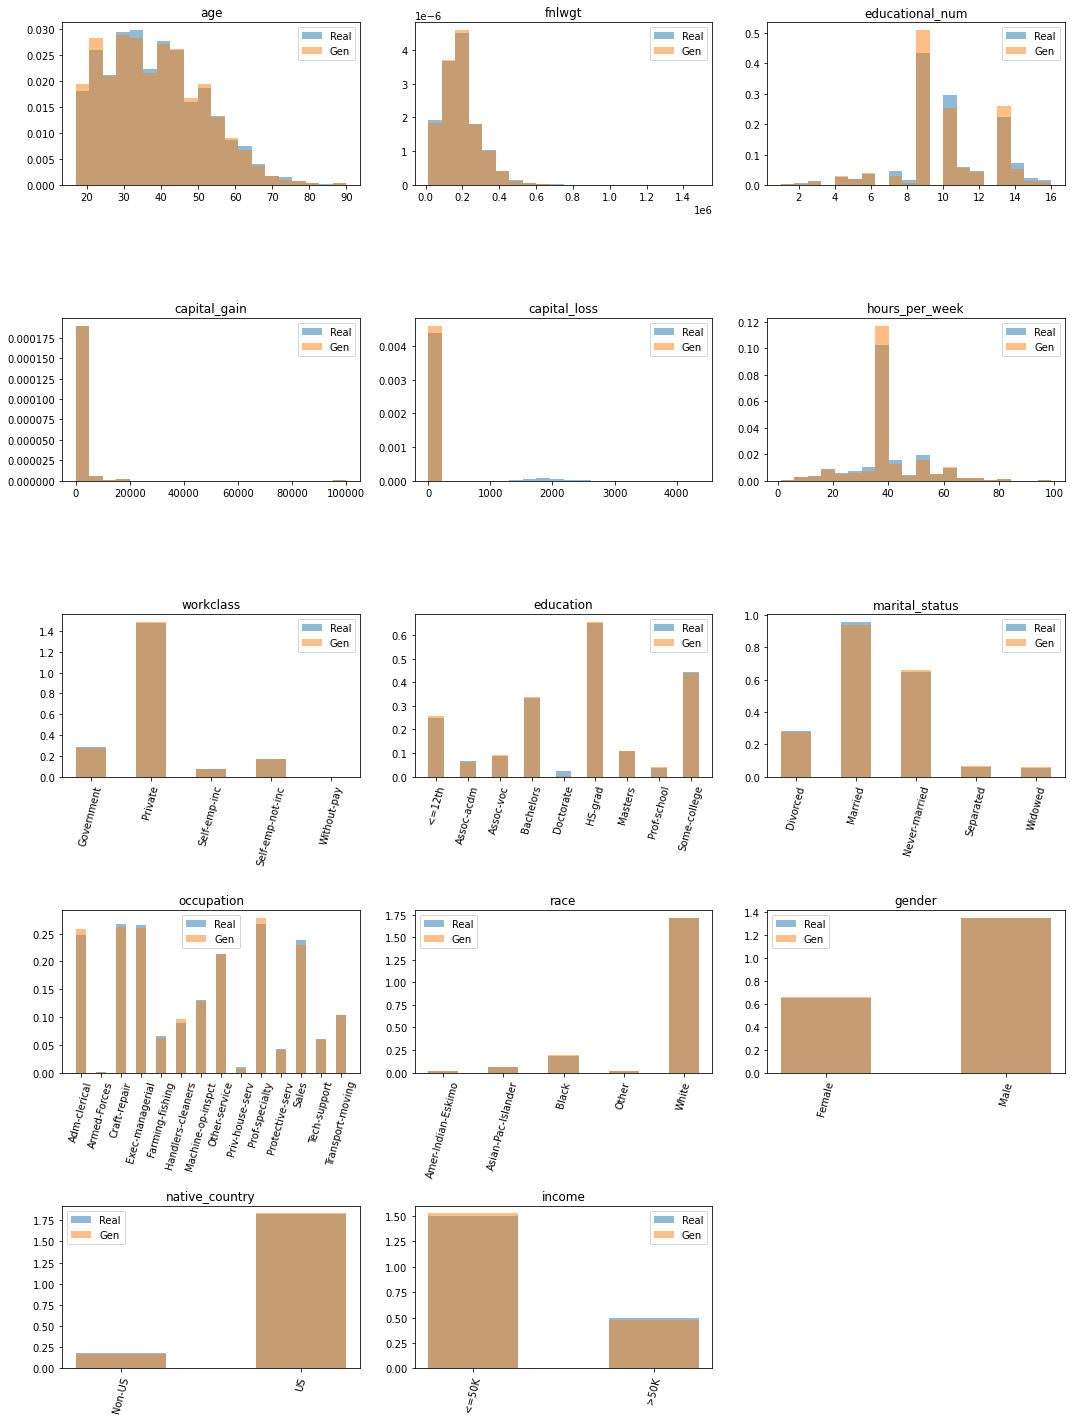

In [112]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "ctabGAN-qt", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "ctabGAN-qt" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

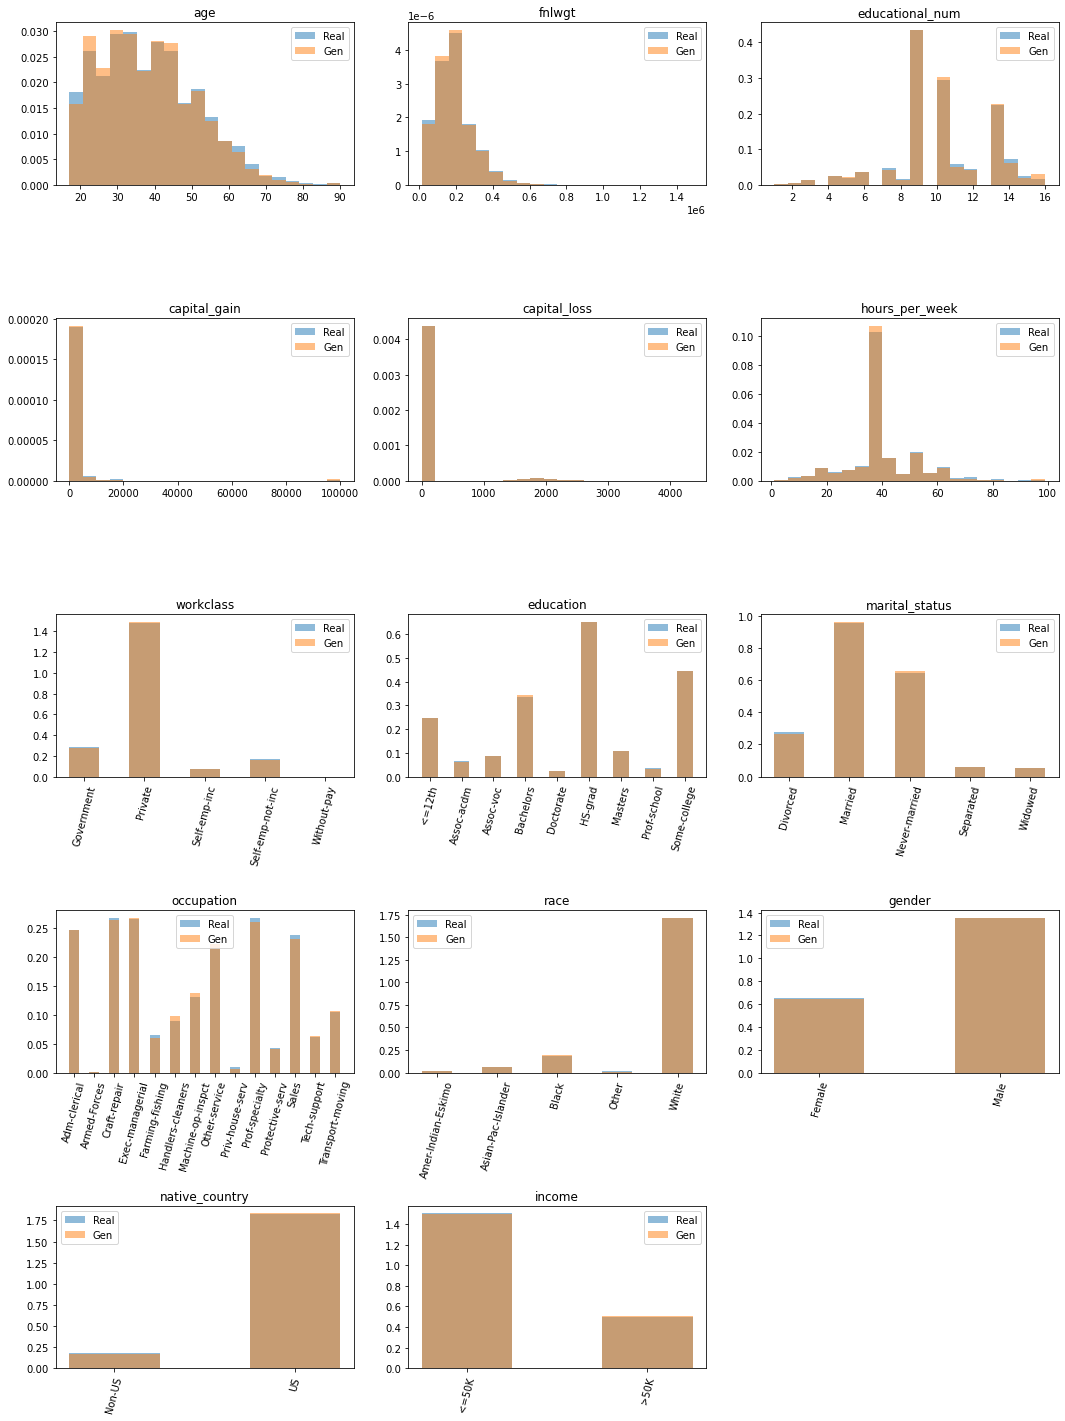

In [86]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "ctabGAN-qtr", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "ctabGAN-qtr" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

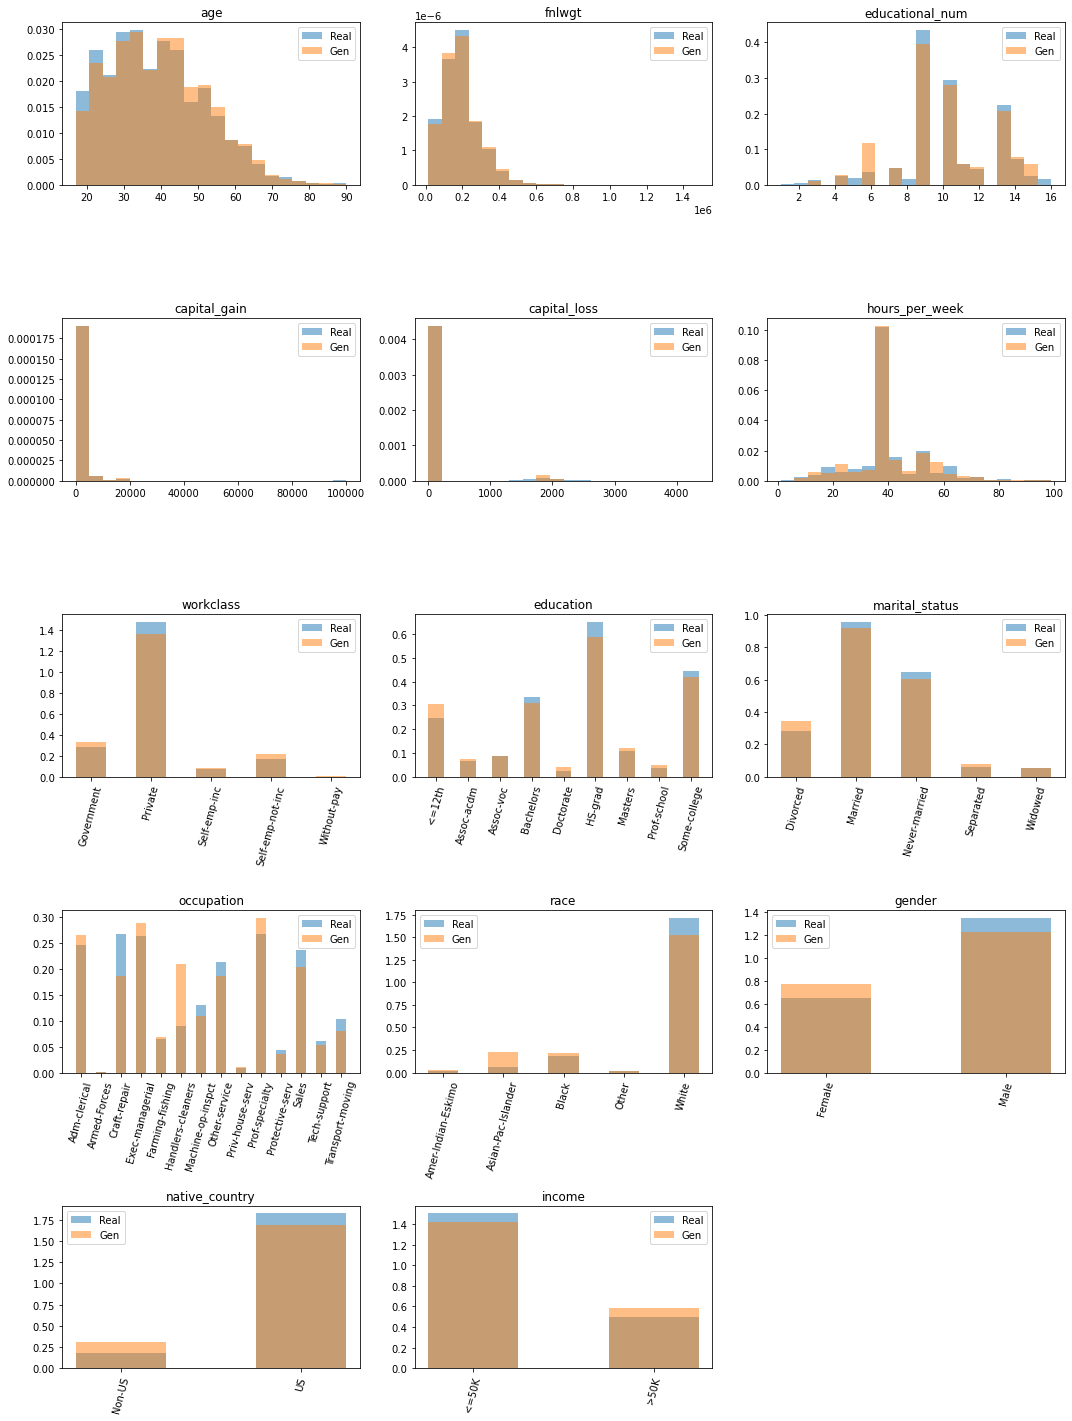

In [87]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "CTGAN-pac1", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "CTGAN-pac1" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

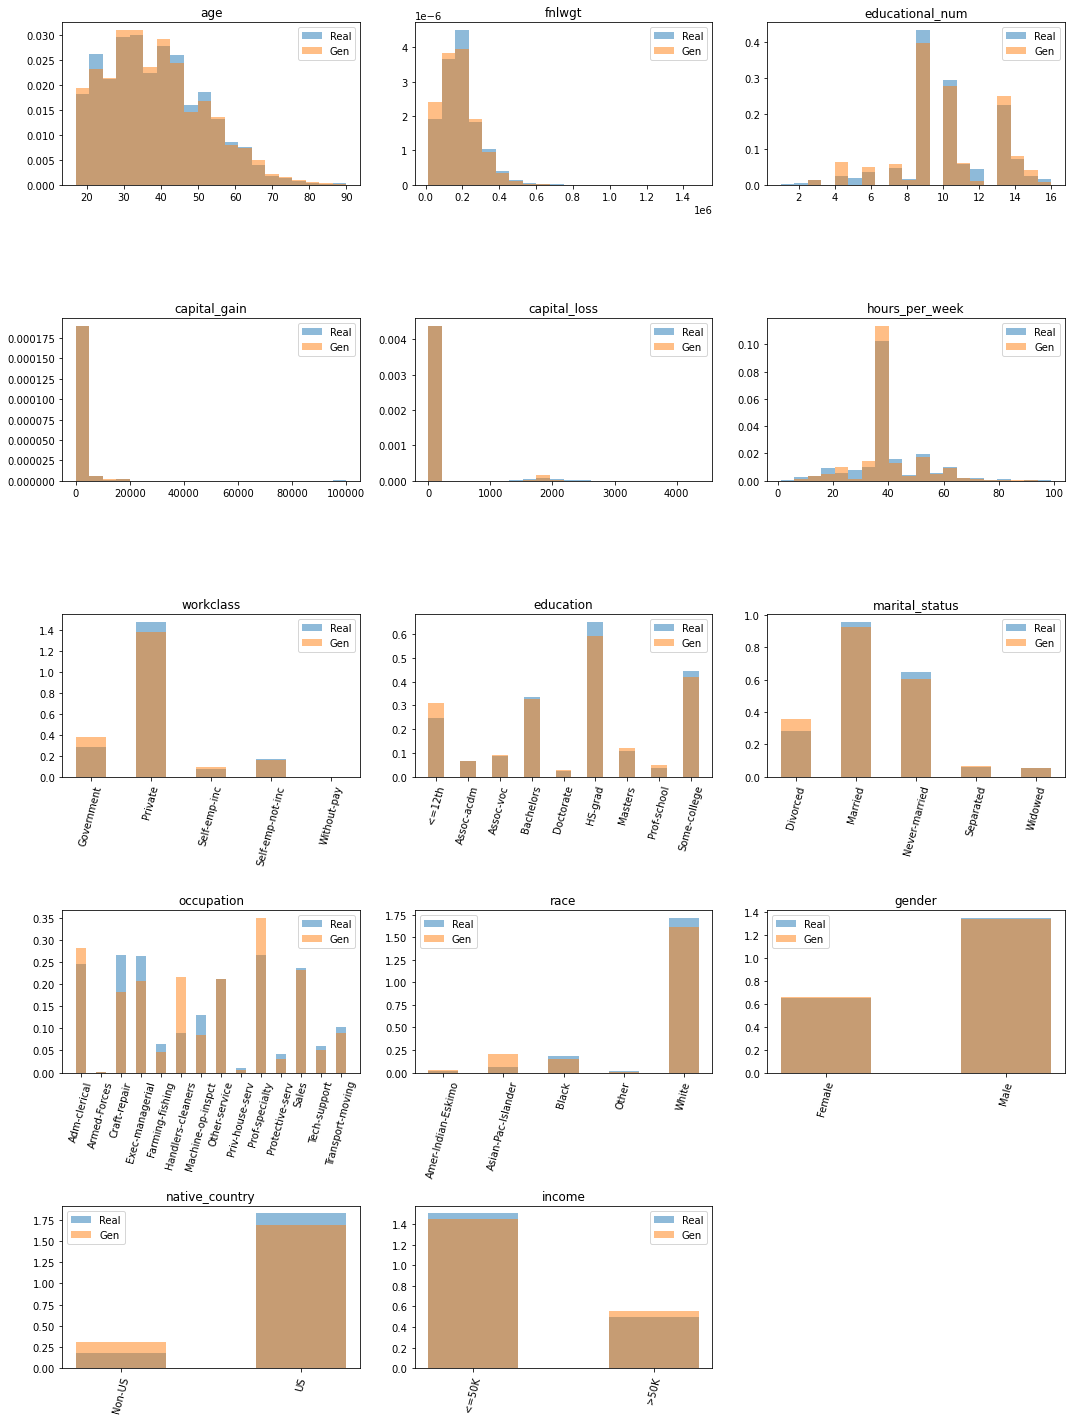

In [88]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "CTGAN-pac10", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "CTGAN-pac10" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

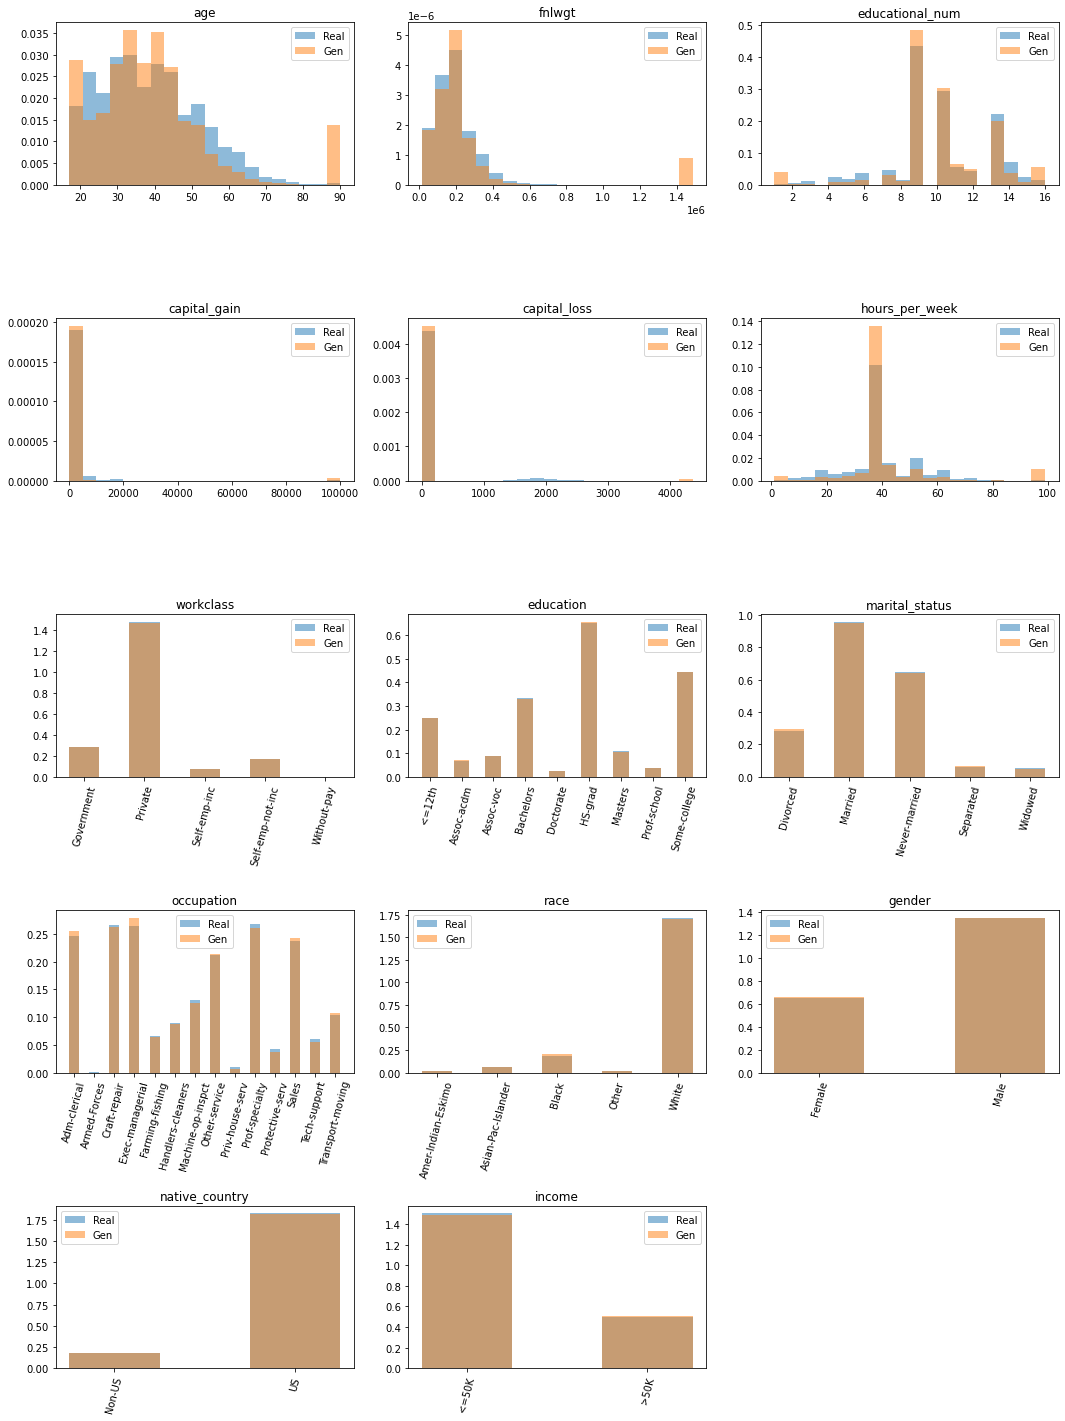

In [89]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "tabFairGAN", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "TabFairGAN" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

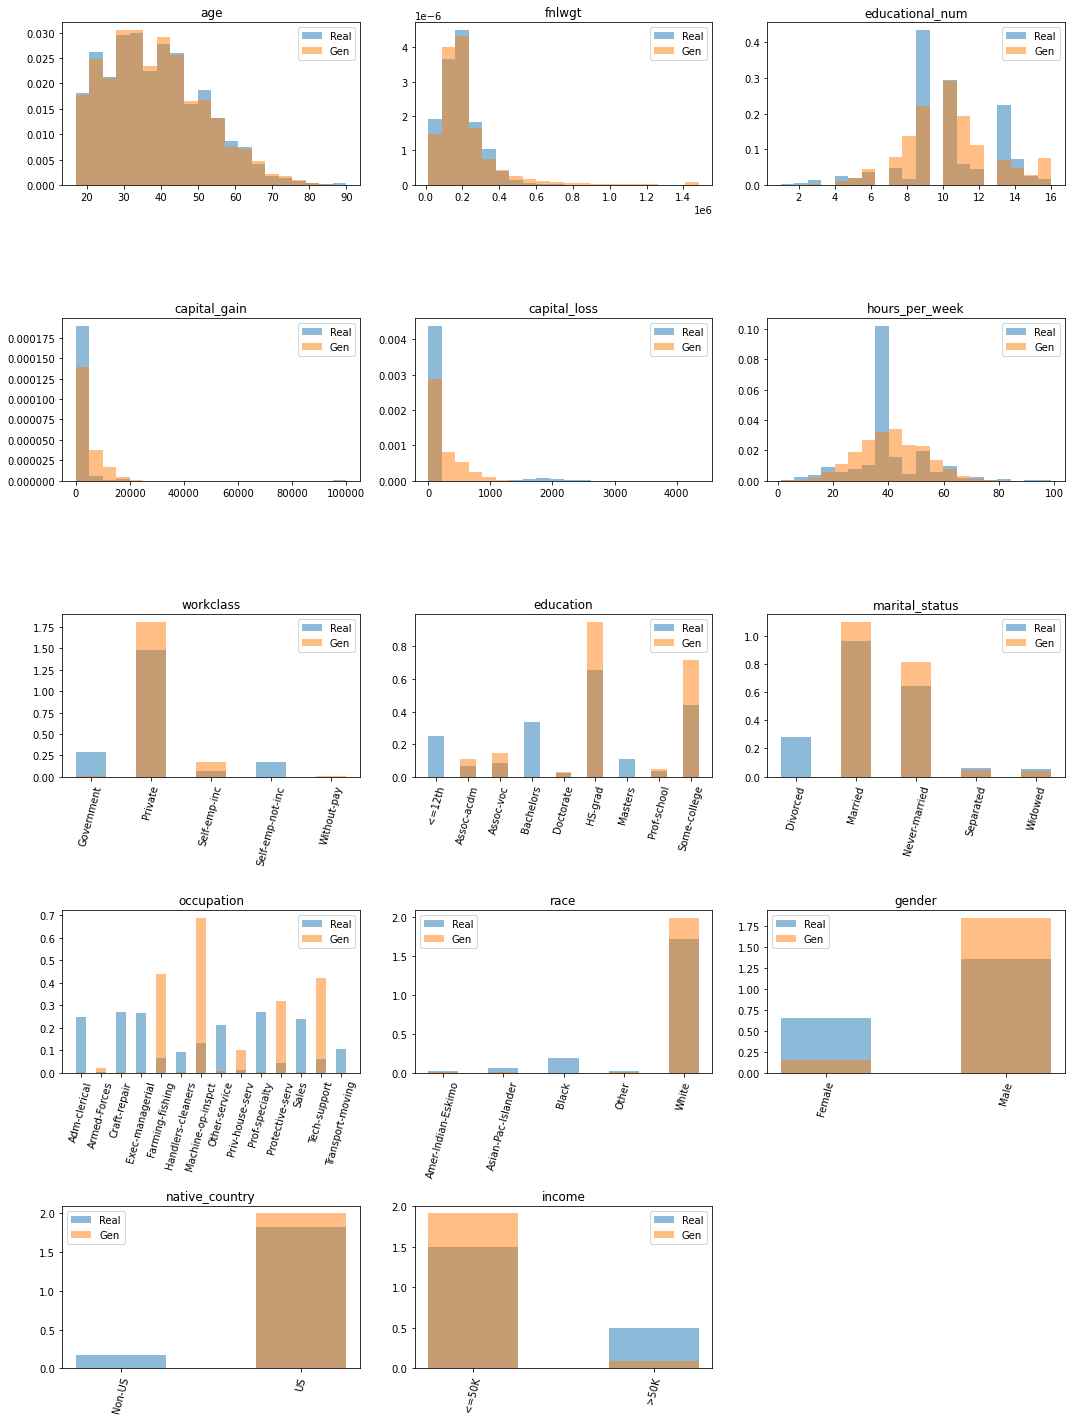

In [90]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "GaussianCopula", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "GaussianCopula" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

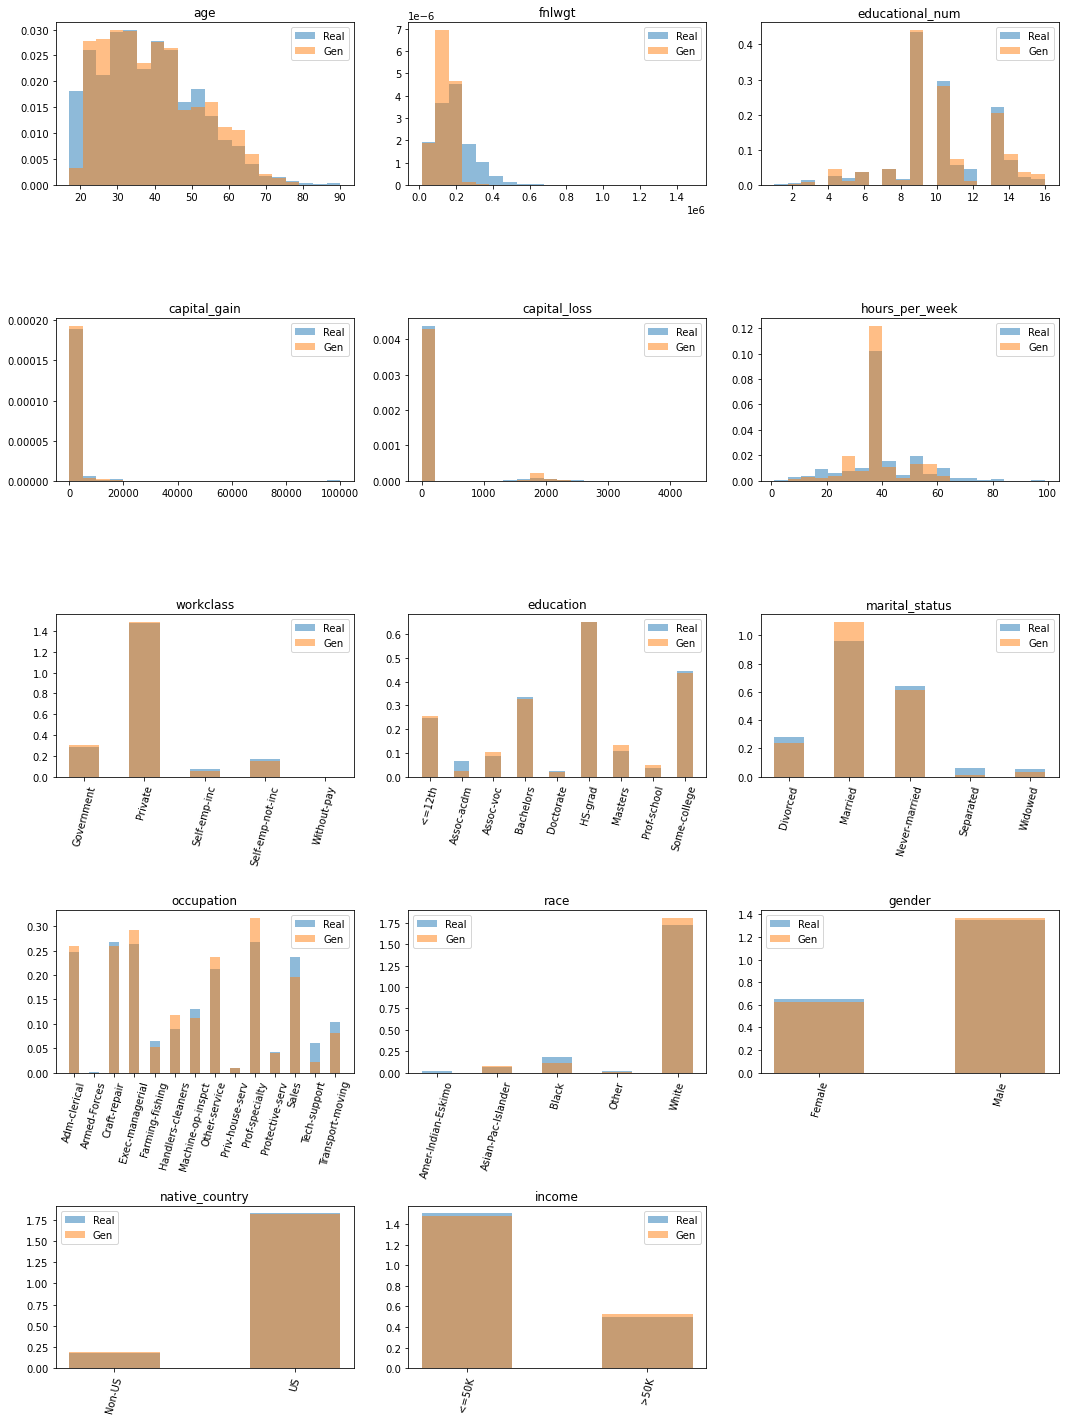

In [91]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "TVAE", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "TVAE-orig" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

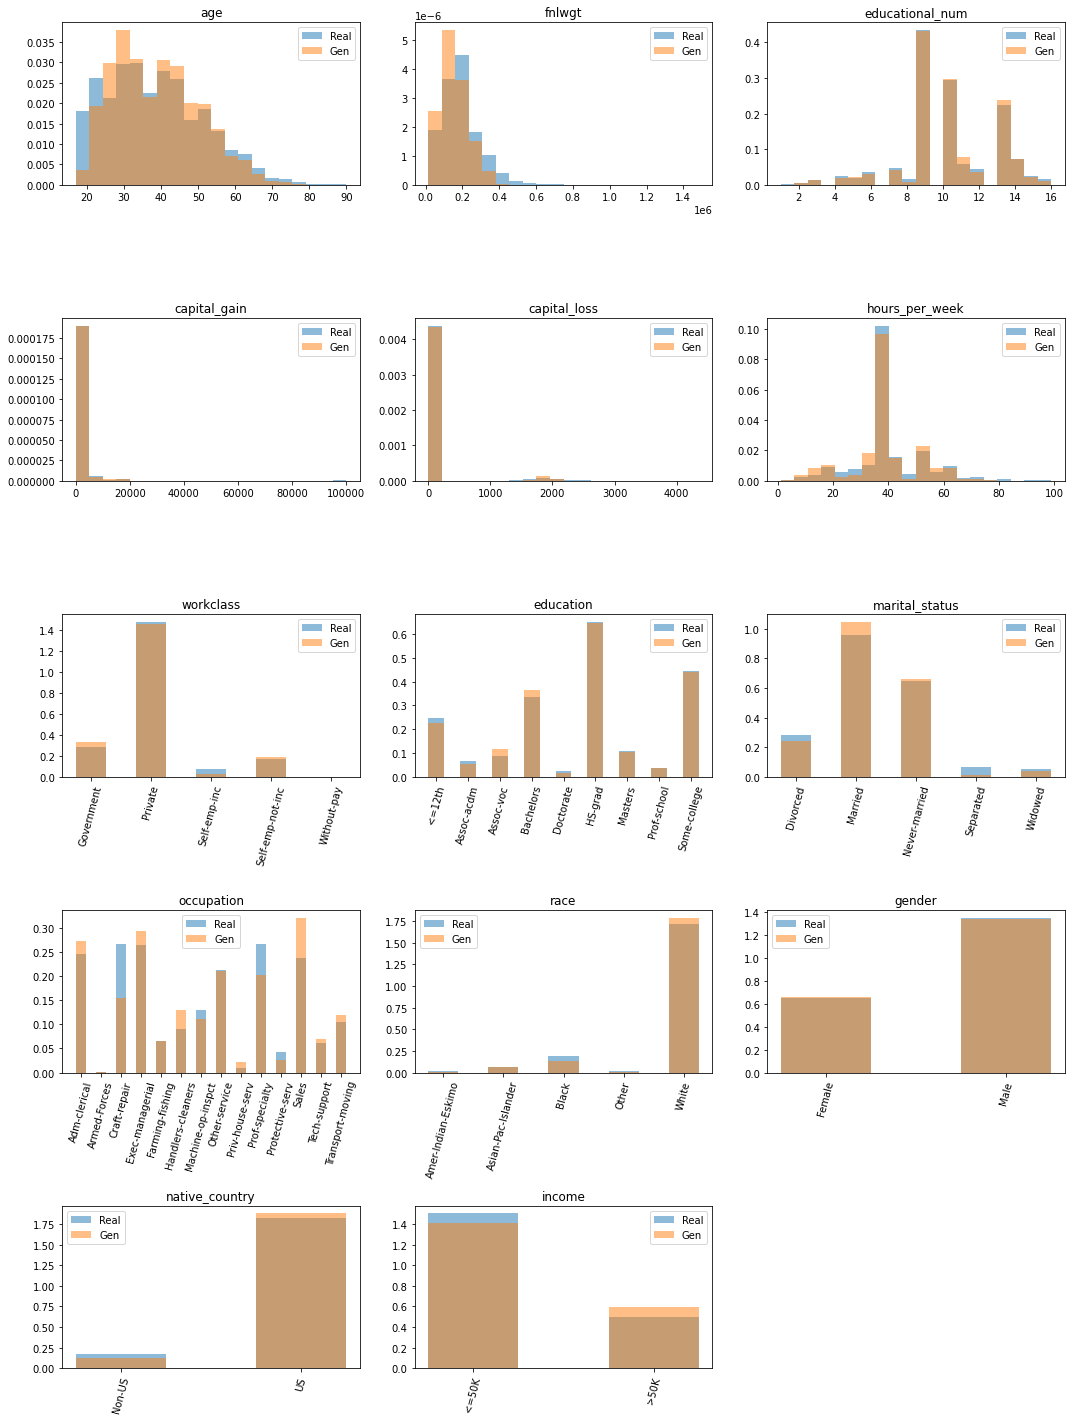

In [92]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "TVAE-mod", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "TVAE-mod" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

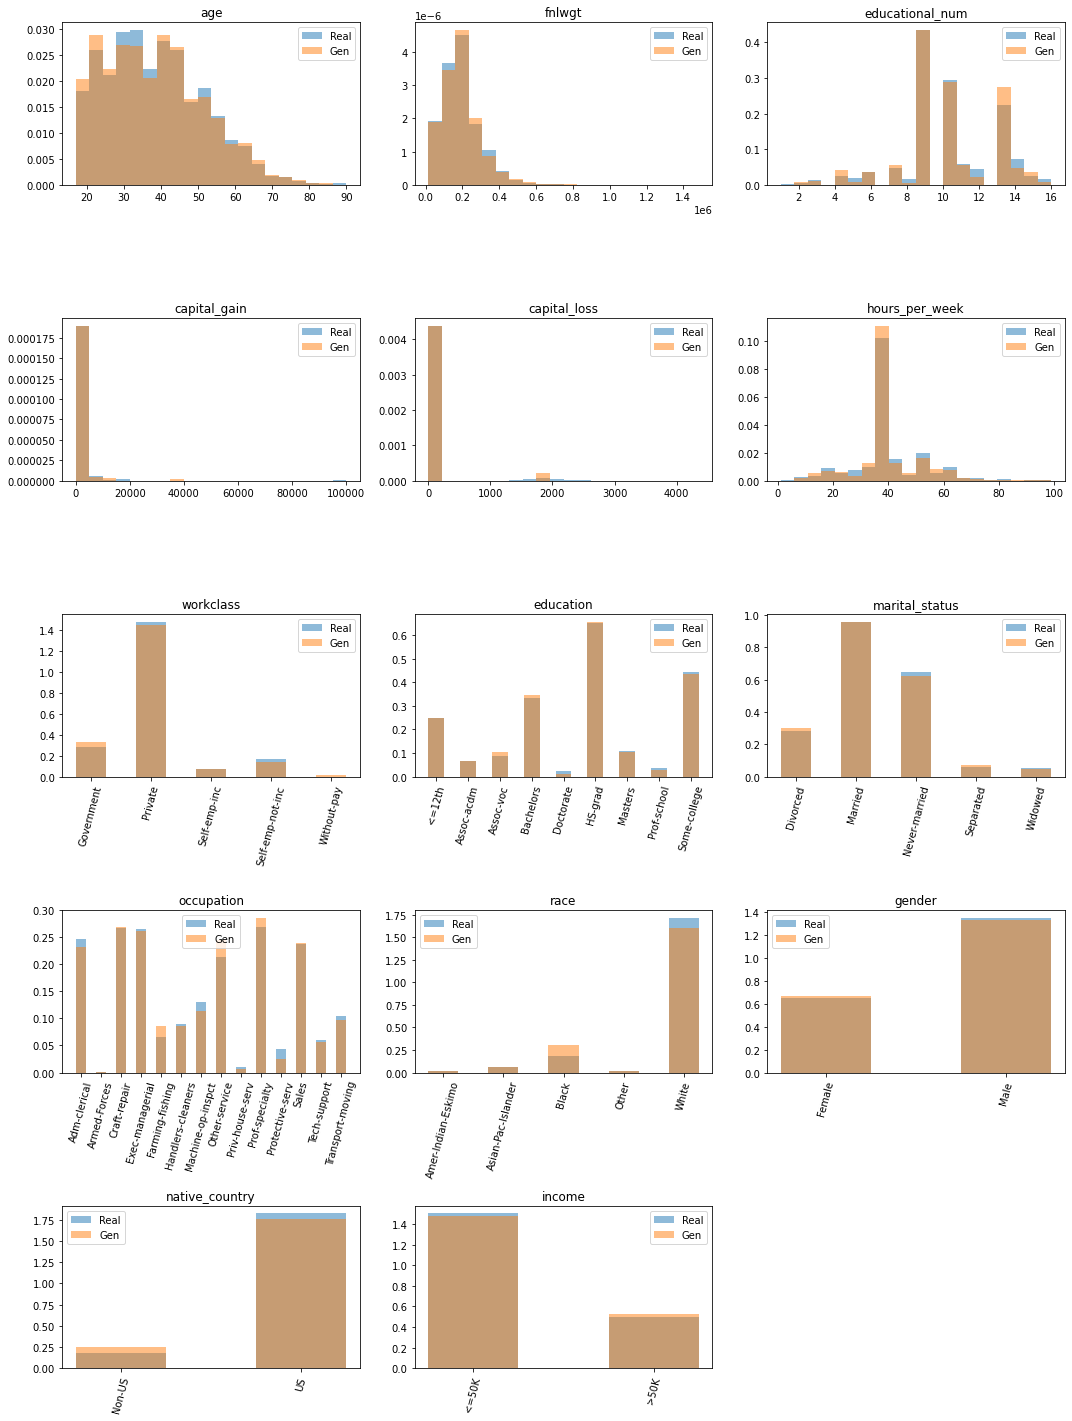

In [93]:
helpers.compare.hist_real_vs_generated(
    tg,
    other_gen_dataset_path=os.path.join(const.dir.data_comparison_gen(), "CopulaGAN", "adult_edited", "gen0.csv"),
    discrete_xtick_rotation = discrete_xtick_rotation,
    save_path = compare_hist_prefix + "CopulaGAN" + image_type,
    save_dir = const.dir.images(), n_img_horiz = n_img_horiz, figsize=figsize)

In [96]:
data_train["hours_per_week"].value_counts()

40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: hours_per_week, Length: 94, dtype: int64

In [110]:
a = data_train["educational_num"].value_counts()
# a = a.loc[a.index < 45]
# a.loc[a.index > 35]
a

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educational_num, dtype: int64

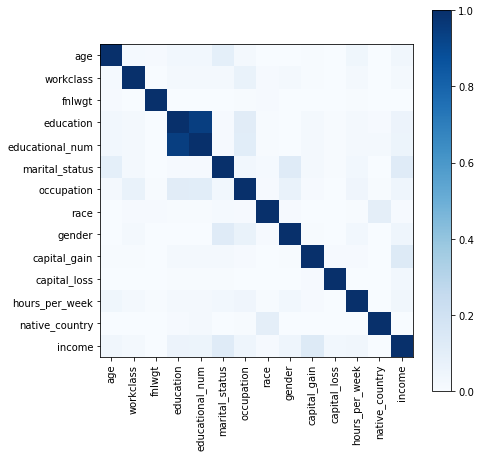

In [15]:
import helpers.nmi_matrix
nmi_matrix_truth = helpers.nmi_matrix.compute(tg, generated_data=False)
fig, ax = plt.subplots(1, figsize=[7,7])
im = plt.imshow(nmi_matrix_truth, cmap = plt.cm.Blues, vmin = 0, vmax = 1)
xticks = ax.set_xticks(np.arange(0, nmi_matrix_truth.shape[0]))
yticks = ax.set_yticks(np.arange(0, nmi_matrix_truth.shape[0]))
xticklabels = ax.set_xticklabels(tg.columns, rotation = 90)
yticklabels = ax.set_yticklabels(tg.columns)
plt.colorbar(im)
fig.savefig(os.path.join(const.dir.images(), "nmi_matrix_true_dataset_adult.pdf"), bbox_inches = "tight")

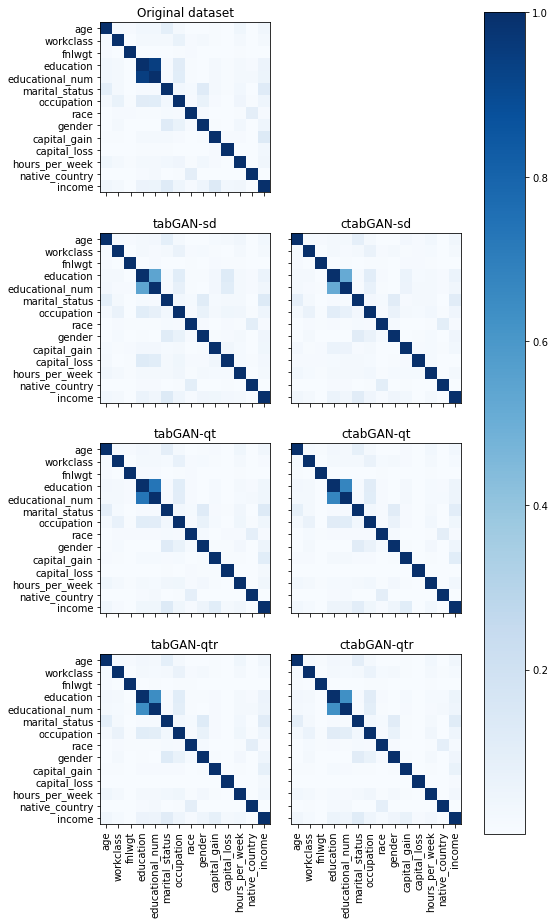

In [22]:
helpers.nmi_matrix.compare(
    [], reference_tgan=tg,
    extra_dataset_paths=[
        os.path.join(const.dir.data_comparison_gen(), "tabGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "ctabGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "tabGAN-qt", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "ctabGAN-qt", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "tabGAN-qtr", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "ctabGAN-qtr", "adult_edited", "gen0.csv"),
    ],
    subplot_titles_extra_datasets = ["tabGAN-sd", "ctabGAN-sd", "tabGAN-qt", "ctabGAN-qt", "tabGAN-qtr", "ctabGAN-qtr"],
    save_dir = const.dir.images(), save_name = "nmi_matrices_tabGAN_methods.pdf", figsize = [7,12],
    subplot_title_true_dataset = "Original dataset",
    ncol=2,
    leave_first_n_empty=1
)

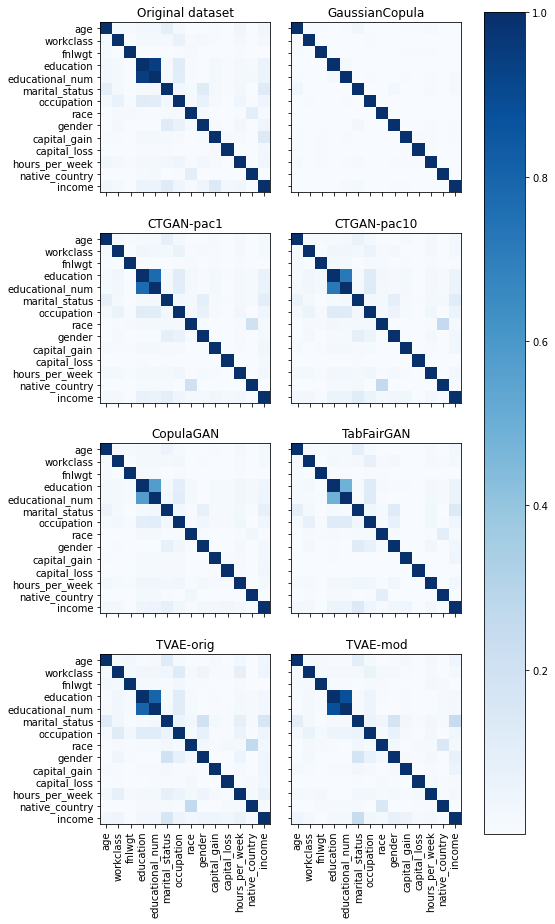

In [23]:
helpers.nmi_matrix.compare(
    [], reference_tgan=tg,
    extra_dataset_paths=[
        os.path.join(const.dir.data_comparison_gen(), "GaussianCopula", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "CTGAN-pac1", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "CTGAN-pac10", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "CopulaGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "TabFairGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "TVAE", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "TVAE-mod", "adult_edited", "gen0.csv"),
    ],
    subplot_titles_extra_datasets = ["GaussianCopula",  "CTGAN-pac1", "CTGAN-pac10", "CopulaGAN", "TabFairGAN",
                                     "TVAE-orig", "TVAE-mod"],
    save_dir = const.dir.images(), save_name = "nmi_matrices_other_synthesizers.pdf", figsize = [7,12],
    subplot_title_true_dataset = "Original dataset",
    ncol=2
)

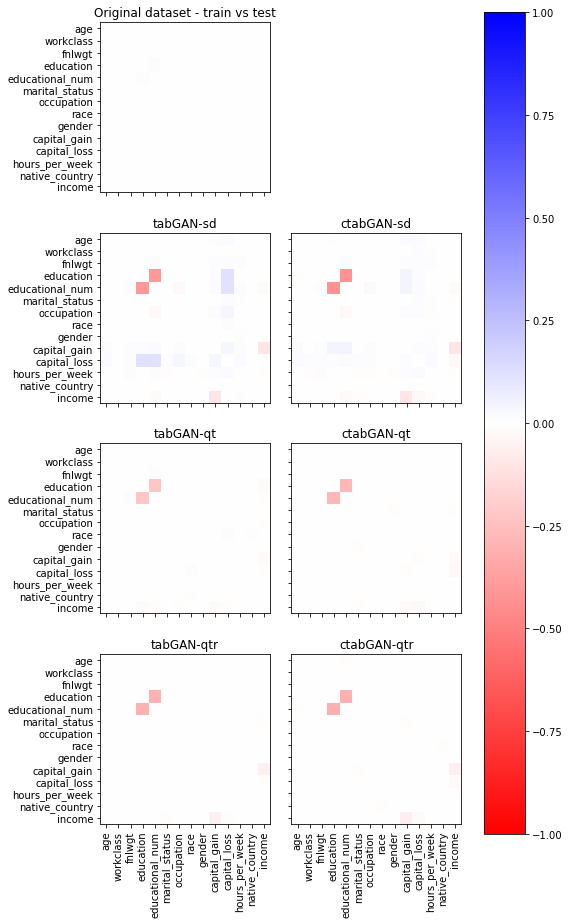

In [24]:
helpers.nmi_matrix.compare(
    [], reference_tgan=tg,
    extra_dataset_paths=[
        os.path.join(const.dir.data_comparison_gen(), "tabGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "ctabGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "tabGAN-qt", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "ctabGAN-qt", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "tabGAN-qtr", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "ctabGAN-qtr", "adult_edited", "gen0.csv"),
    ],
    subplot_titles_extra_datasets = ["tabGAN-sd", "ctabGAN-sd", "tabGAN-qt", "ctabGAN-qt", "tabGAN-qtr", "ctabGAN-qtr"],
    save_dir = const.dir.images(), save_name = "diff_nmi_matrices_tabGAN_methods.pdf", figsize = [7,12],
    subplot_title_true_dataset = "Original dataset - train vs test",
    compute_diff_nmi_matrices=True,
    ncol=2,
    only_use_first_n_rows=data_test.shape[0],
    data_test = data_test,
    leave_first_n_empty=1
)

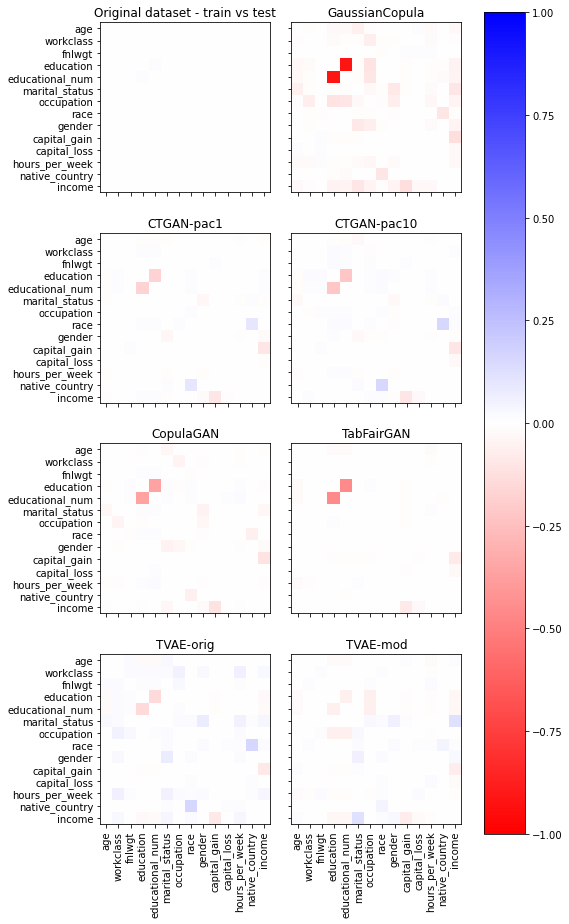

In [25]:
helpers.nmi_matrix.compare(
    [], reference_tgan=tg,
    extra_dataset_paths=[
        os.path.join(const.dir.data_comparison_gen(), "GaussianCopula", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "CTGAN-pac1", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "CTGAN-pac10", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "CopulaGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "TabFairGAN", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "TVAE", "adult_edited", "gen0.csv"),
        os.path.join(const.dir.data_comparison_gen(), "TVAE-mod", "adult_edited", "gen0.csv"),
    ],
    subplot_titles_extra_datasets = ["GaussianCopula",  "CTGAN-pac1", "CTGAN-pac10", "CopulaGAN", "TabFairGAN",
                                     "TVAE-orig", "TVAE-mod"],
    save_dir = const.dir.images(), save_name = "diff_nmi_matrices_other_synthesizers.pdf", figsize = [7,12],
    subplot_title_true_dataset = "Original dataset - train vs test",
    compute_diff_nmi_matrices=True,
    ncol=2,
    only_use_first_n_rows=data_test.shape[0],
    data_test = data_test
)

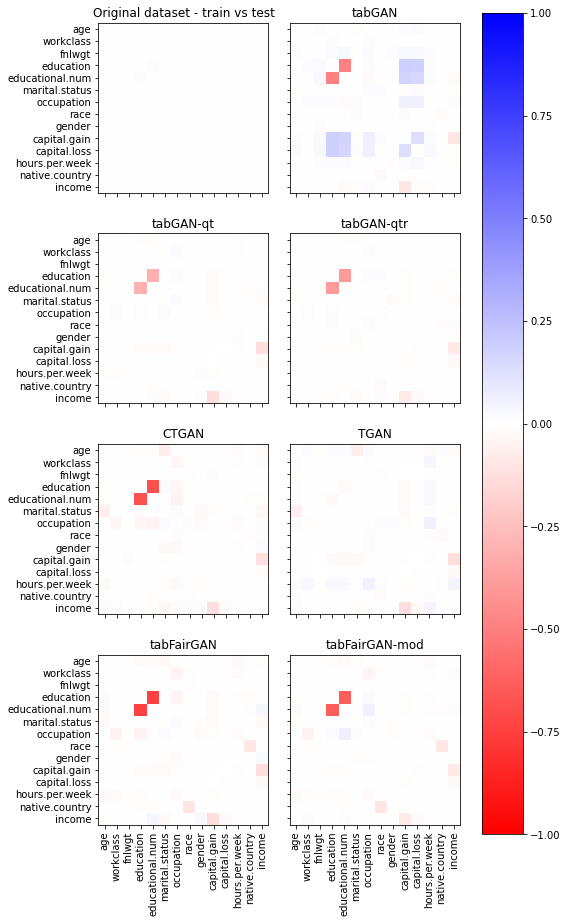

In [59]:
%run "$utils_path"
nrow_data_test = data_test.shape[0]
compare_nmi_matrices([tg, tg_qt, tg_qtr],
                     extra_datasets = [ctgan_synthetic_data.head(nrow_data_test),
                                       tgan_synthetic_data.head(nrow_data_test),
                                       tabFairGAN_synthetic_data.head(nrow_data_test),
                                       tabFairGAN_mod_synthetic_data.head(nrow_data_test)],
                     ncol = 2, subplot_titles_tgans =  ["tabGAN", "tabGAN-qt", "tabGAN-qtr"],
                     subplot_titles_extra_datasets = ["CTGAN", "TGAN", "tabFairGAN", "tabFairGAN-mod"],
                    compute_diff_nmi_matrices = True, save_dir = image_dir, save_name = "nmi_diff_matrices.svg",
                    figsize=[7, 12], data_test = data_test,
                    subplot_title_true_dataset = "Original dataset - train vs test")

{'tabGAN': 224.1135617, 'tabGAN-qt': 220.6946488000001, 'tabGAN-qtr': 218.06418589999976, 'TGAN': 2684.3796731, 'CTGAN': 1096.1660361000004, 'TabFairGAN': 41.21781310000006, 'tabFairGAN': 200.31647810000004, 'tabFairGAN-mod': 299.68523240000013}


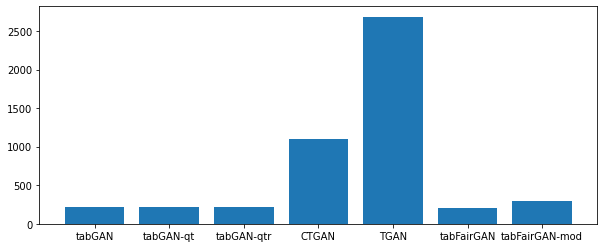

In [60]:
timer_tgan = load_timer(timer_path)
print(timer_tgan.elapsed_time)
#models = timer_tgan.elapsed_time.keys()
models = ['tabGAN', 'tabGAN-qt', 'tabGAN-qtr', 'CTGAN', 'TGAN', "tabFairGAN", "tabFairGAN-mod"]
times = [timer_tgan.elapsed_time[key] for key in models]
plt.figure(figsize = [10,4])
plt.bar(models, times)
timer_tgan.elapsed_time.keys()
plt.savefig(os.path.join(image_dir, "total_train_time_plot.svg"))

In [ ]:
nmi_matrix_truth = compute_nmi_matrix(tg, dataset=data_train, generated_data=False)  - compute_nmi_matrix(tg, dataset=data_test, generated_data=False)
fig, ax = plt.subplots(1, figsize=[5,5])
colors_blue = plt.cm.Blues(np.linspace(0., 1, 96))
colors_red = np.flip(plt.cm.Reds(np.linspace(0, 1, 96)))
colors = np.vstack((colors_red, colors_blue))
#cmap_diff_nmi = mcolors.LinearSegmentedColormap.from_list('my_blue_red_colormap', colors, alpha=0.8)
cmap_diff_nmi = sns.diverging_palette(250, 10, sep = 1, n=200, s=100, as_cmap=True)
im = plt.imshow(nmi_matrix_truth, cmap = plt.cm.bwr_r, vmin = -1, vmax = 1)
xticks = ax.set_xticks(np.arange(0, nmi_matrix_truth.shape[0]))
yticks = ax.set_yticks(np.arange(0, nmi_matrix_truth.shape[0]))
xticklabels = ax.set_xticklabels(tg.columns, rotation = 90)
yticklabels = ax.set_yticklabels(tg.columns)
plt.colorbar(im)